# Sustainable Energy: Ambitious Goals vs Economic Feasibility

**Team 40**  
Hanna Daorah (15565823)  
Leonardo Sabatini (15781542)  
Jordan Cheuk-Alam (15086796)  
Santino Petrovic (15675602)

---

# Table of Contents
1. [Introduction](#introduction)
2. [Dataset and Preprocessing](#dataset-and-preprocessing)
3. [Perspective 1: Ambitious Transition](#perspective-1-ambitious-transition)
4. [Perspective 2: Gradual Transition](#perspective-2-gradual-transition)
5. [Visualizations Overview](#visualizations-overview)
6. [Reflection](#reflection)
7. [Work Distribution](#work-distribution)

---

# Introduction (has to be improved upon with sources etc.)

The global shift towards sustainable energy has ignited divergent views on how quickly and extensively this transition should occur. While one side argues for rapid decarbonization supported by the exponential growth of renewable technologies, the other side warns of practical constraints and calls for a more measured transition to preserve energy security and economic stability.

This data story juxtaposes these two perspectives. By analyzing monthly energy production data alongside macro-level indicators of renewable energy adoption and socio-economic context, we aim to surface the key tensions and trade-offs in the current energy debate.

**Perspective 1: Ambitious Transition**  
- Renewable energy is scaling rapidly and displacing fossil fuels.
- This trend justifies aggressive investment in solar, wind, and hydropower.
- Argument visualized through multi-line plots and area charts showing rapid growth in renewable sources.

**Perspective 2: Gradual Transition**  
- Despite growth, renewables remain a minority in many countries.
- Infrastructure and economic dependencies necessitate fossil fuels during the transition.
- Argument supported by choropleth maps and scatterplots revealing cross-country disparities and constraints.

---

# Dataset and Preprocessing

This section outlines the datasets used in our analysis, their origin, structure, and the preprocessing steps necessary to ensure consistency, relevance, and analytical clarity. By combining high-frequency electricity production data with annual sustainability indicators, we enable both temporal and cross-sectional analyses of the global energy transition.


## Datasets

### Dataset 1: Monthly Electricity Production per Source

- **Source:** [Kaggle – IEA Monthly Electricity Statistics](https://www.kaggle.com/datasets/ccanb23/iea-monthly-electricity-statistics)  
- **Original File:** `data.csv`  
- **Period Covered:** 2010–2022  
- **Size:** 181,915 rows, 12 columns  
- **Key Fields:**
  - `COUNTRY`: Name of the reporting country  
  - `PRODUCT`: Type of energy source (e.g., Solar, Wind, Hydro, Fossil fuels)  
  - `VALUE`: Monthly electricity production in GWh  
  - `YEAR`, `MONTH`: Timestamp fields  
  - `share`: Monthly fraction of each source in total production  

This dataset enables granular, source-specific monthly energy trend analysis by country.

---

### Dataset 2: Global Sustainable Energy Indicators

- **Source:** [Kaggle – Global Data on Sustainable Energy](https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy)  
- **Original File:** `global-data-on-sustainable-energy.csv`  
- **Period Covered:** 2000–2020  
- **Size:** 3,649 rows, 21 columns  
- **Key Variables:**
  - `Renewable energy share in total final energy consumption (%)`  
  - `Access to electricity (% of population)`  
  - `Access to clean fuels for cooking (%)`  
  - `gdp_per_capita`  
  - `gdp_total`

This dataset supports macro-level evaluation of energy access, economic capacity, and renewable adoption across countries.

---

## Preprocessing

### Phase 1: Structural Harmonization
- Renamed inconsistent columns (e.g., `Entity` → `COUNTRY`, `Value` → `VALUE`).
- Created a unified datetime column (`DATE`) by merging `YEAR` and `MONTH`.
- Filtered out aggregate entries (e.g., “World”, “OECD”) and irrelevant metadata fields.
- Selected a consistent subset of `PRODUCT` categories relevant to the energy transition (e.g., Solar, Wind, Hydro, Fossil fuels).

### Phase 2: Standardization and Feature Engineering
- Normalized country and category naming conventions across datasets.
- Retained the `share` field from the production dataset for proportional analysis.
- Engineered new variable `YoY_Growth_Renewable`: year-over-year percentage point change in renewable energy share.
- Trimmed both datasets to remove unused columns and reduce dimensionality.

**Note:** Cleaned versions were kept in memory. For larger pipelines, exporting to compressed `.parquet` format with gzip is recommended to preserve structure and minimize I/O load.

---

## Core Variables

### Continuous Variables
- `VALUE` (GWh): Monthly electricity production  
- `share` (0–1): Source’s share of total monthly production  
- `Renewable energy share in total final energy consumption (%)`  
- `Access to electricity (% of population)`  
- `Access to clean fuels for cooking (%)`  
- `gdp_per_capita` (USD)  
- `YoY_Growth_Renewable`: Annual change in renewable share

### Categorical Variables
- `COUNTRY`: Reporting country  
- `PRODUCT`: Energy source category

### Temporal Variables
- `DATE`: Monthly (production data) or annual (indicator data) timestamp

---

## Aggregations for Visualization

1. **Monthly Energy Production Trends**  
   - Aggregated `VALUE` by `PRODUCT` and `DATE` to compare time-series trends of different sources.

2. **Country-Level Fossil vs Renewable Comparison**  
   - Summed annual production per country by source type; ranked top 10 countries.

3. **Renewable Share and Access to Electricity Over Time**  
   - Computed annual averages across selected countries (e.g., G20).

4. **Renewable Share vs GDP per Capita**  
   - Merged economic and energy indicators for scatterplots and animated bubble charts.

5. **Annual Renewable Growth (YoY)**  
   - Calculated and mapped year-over-year changes in renewable share via choropleth.

6. **Country-Focused Renewable Trends**  
   - Displayed annual renewable share for selected countries using small multiples.

These steps enable high-resolution tracking of production growth, comparative socio-economic context, and progress disparities across countries and energy sources.


---

# Perspective 1: Ambitious Transition

**Argument 1.1: Renewables are rapidly scaling and replacing fossil fuels**  
- Multi-line chart of monthly production from 2010–2022 shows increasing renewable output.
- Stacked area chart illustrates renewable share expansion over time.

**Argument 1.2: Certain countries are nearing or exceeding targets**  
- Choropleth map for latest year highlights countries with high renewable shares.
- Faceted line charts show renewable share trends over time for selected high-performing countries.

---


# Perspective 2: Gradual Transition

**Argument 2.1: Most countries remain far below renewable targets**  
- Choropleth map with red-green scale shows uneven global uptake.
- Bar chart comparison between fossil and renewable sources for top producing countries.

**Argument 2.2: Economic and access constraints limit renewable adoption**  
- Scatter plot: GDP per capita vs Renewable Share, with access to electricity as bubble size.
- Pair plot matrix reveals correlations between economic indicators and renewable uptake.

**Argument 2.3: Year-on-year change is minimal or regressive in many cases**  
- Choropleth animation: annual change in renewable share classified as increase/decline.
- Annotations show stagnation in key developing nations.

---

# Visualizations Overview (not done, just an example)

| Visualization Type            | Variable(s) Used                                                  | Argument Link                        | Status            |
|------------------------------|-------------------------------------------------------------------|--------------------------------------|-------------------|
| Multi-line Time Series       | `VALUE`, `PRODUCT`, `YEAR`, `MONTH`                              | Arg. 1.1                              | Nearly finished   |
| Stacked Area Chart           | `VALUE`, `PRODUCT`, `MONTHLY SHARE`                              | Arg. 1.1                              | Nearly finished   |
| Choropleth (latest share)    | `Renewable Share (%)`, `Entity`, `Year`                          | Arg. 1.2, 2.1                         | Nearly finished   |
| Faceted Line Charts          | `Renewable Share (%)`, `Entity`, `Year`                          | Arg. 1.2                              | Nearly finished   |
| Bubble Chart                 | `gdp_per_capita`, `Renewable Share`, `Access to Electricity`     | Arg. 2.2                              | Draft version     |
| Pair Plot Matrix             | Multiple socio-economic and energy indicators                    | Arg. 2.2                              | Draft version     |
| Animated Choropleth (Growth)| `Growth_Cat`, `Year`, `Entity`                                   | Arg. 2.3                              | Nearly finished   |
| Bar Chart (Top Countries)    | `VALUE`, `PRODUCT`, `COUNTRY`                                    | Arg. 2.1                              | Draft version     |





### Dataset Loading

This cell loads the two primary datasets used throughout the analysis:

- `data.csv`: Monthly electricity production by energy source and country (2010–2022)
- `global-data-on-sustainable-energy.csv`: Annual sustainability indicators per country (2000–2020)

These datasets form the foundation for all subsequent preprocessing, visualizations, and argumentation.


In [1]:
import plotly.io as pio
pio.renderers.default = "notebook_connected"


import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# Laad de originele datasets
monthly_df = pd.read_csv("data.csv")
global_df = pd.read_csv("global-data-on-sustainable-energy.csv")


### Monthly Energy Production by Source (GWh)

This line chart displays the monthly electricity production of three major energy sources: **Solar**, **Wind**, and **Total Combustible Fuels** from 2010 to 2022. The graph highlights the dynamic interplay between renewable and fossil-based generation, showing a clear upward trend for wind and solar, while fossil fuels exhibit more fluctuation.

- **X-axis:** Time (monthly, 2010–2022)  
- **Y-axis:** Electricity production in gigawatt-hours (GWh)  
- **Lines:** Energy sources  
- **Purpose:** Supports Argument 1.1 by visualizing the growth of renewables over time


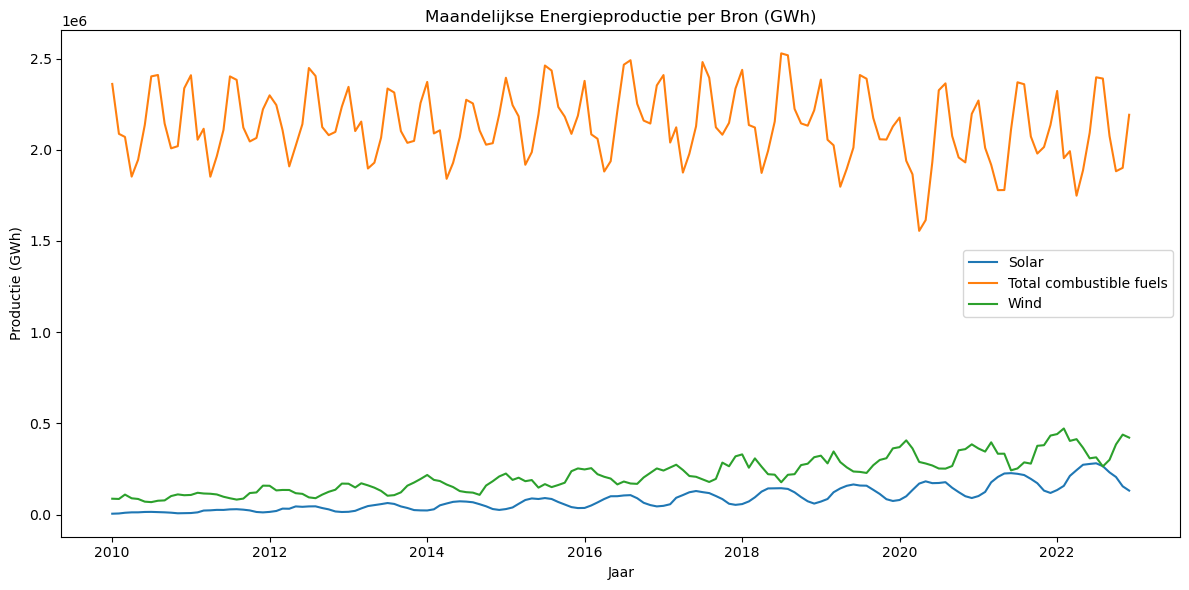

In [2]:
import matplotlib.pyplot as plt

main_sources = ['Solar', 'Wind', 'Total combustible fuels']
df = monthly_df[monthly_df['PRODUCT'].isin(main_sources)].copy()
df['DATE'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str))
pivot = df.pivot_table(index='DATE', columns='PRODUCT', values='VALUE', aggfunc='sum').dropna()

plt.figure(figsize=(12, 6))
for col in pivot.columns:
    plt.plot(pivot.index, pivot[col], label=col)
plt.title("Maandelijkse Energieproductie per Bron (GWh)")
plt.xlabel("Jaar")
plt.ylabel("Productie (GWh)")
plt.legend()
plt.tight_layout()
plt.show()


### Energy Source Share Over Time (Stacked Area Chart)

This stacked area chart visualizes the proportional share of four key energy sources—**Solar**, **Wind**, **Hydro**, and **Total Combustible Fuels**—within the total monthly electricity production from 2010 to 2022. The graph emphasizes the evolving composition of the energy mix, highlighting the gradual increase of renewables relative to fossil fuels.

- **X-axis:** Time (monthly, 2010–2022)  
- **Y-axis:** Share of total electricity production (0–1 scale)  
- **Areas:** Energy sources stacked to reflect cumulative share proportions  
- **Transparency:** Set to 0.8 for visibility of overlapping areas  
- **Purpose:** Supports Argument 1.1 by illustrating the growth in renewable energy’s share and the declining relative contribution of fossil fuels over time


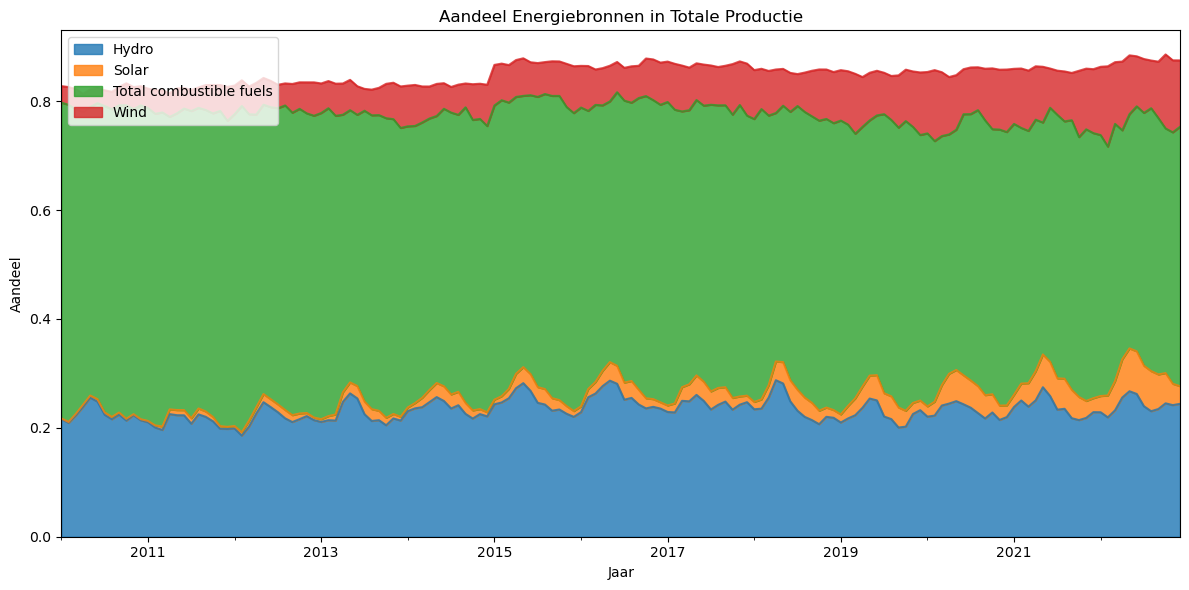

In [3]:
stack_sources = ['Solar', 'Wind', 'Hydro', 'Total combustible fuels']
df = monthly_df[monthly_df['PRODUCT'].isin(stack_sources)].copy()
df['DATE'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str))
pivot_share = df.pivot_table(index='DATE', columns='PRODUCT', values='share', aggfunc='mean').fillna(0)

pivot_share.plot.area(figsize=(12, 6), alpha=0.8)
plt.title("Aandeel Energiebronnen in Totale Productie")
plt.xlabel("Jaar")
plt.ylabel("Aandeel")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


### Latest Renewable Energy Share by Country (Choropleth Map)

This choropleth map displays the most recent available data for the share of renewable energy in total final energy consumption across countries. It uses a green-yellow gradient to represent the percentage share, visually distinguishing countries with higher versus lower renewable energy adoption.

- **Geography:** Countries worldwide, identified by name  
- **Color scale:** Continuous, from low (yellow) to high (green) renewable share  
- **Data points:** Latest year with valid data per country  
- **Interactivity:** Hover reveals country name and year of data  
- **Projection:** Natural Earth for accurate global representation  
- **Purpose:** Supports Arguments 1.2 and 2.1 by highlighting geographic disparities in renewable energy adoption at the most current time point


In [4]:
import pandas as pd
import plotly.express as px

# Kolomnaam instellen
col = 'Renewable energy share in the total final energy consumption (%)'

# Filter op rijen met geldige waarden
filtered = global_df[['Entity', 'Year', col]].dropna()

# Kies per land het laatste jaar met data
latest = filtered.loc[filtered.groupby('Entity')['Year'].idxmax()].copy()
latest.rename(columns={col: 'Renewable Share (%)'}, inplace=True)

# Plot met Plotly
fig = px.choropleth(
    latest,
    locations="Entity",
    locationmode="country names",
    color="Renewable Share (%)",
    color_continuous_scale="YlGn",
    title="Laatste Beschikbare Renewable Energy Share per Land",
    hover_name="Entity",
    hover_data={"Year": True}
)

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type="natural earth"
    ),
    coloraxis_colorbar=dict(
        title="% Renewable",
        ticks="outside"
    )
)

fig.show()




### Interactive Scatter Matrix (2019)

This scatter plot matrix visualizes relationships between four key development and sustainability indicators for the year 2019:

- **Log GDP per Capita:** Economic wealth (log-transformed for scale normalization)
- **Renewable Share (%):** Proportion of renewables in total final energy consumption
- **Electricity Access (%):** Population percentage with access to electricity
- **Clean Cooking (%):** Population percentage with access to clean cooking fuels

- **Color encoding:** Based on clean cooking access (%), using the *Viridis* scale  
- **Interactivity:** Allows selection, hover, and inspection of country-level data  
- **Diagonal elements:** Suppressed for clarity (no histograms/KDE)  
- **Purpose:** Enables multivariate comparison across nations to explore correlations between economic development and energy access, supporting Argument 2.1


In [5]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# 1. Data inladen en filteren op 2019
df = global_df.copy()
year = 2019
df = df[df['Year'] == year].dropna(subset=[
    'gdp_per_capita',
    'Renewable energy share in the total final energy consumption (%)',
    'Access to electricity (% of population)',
    'Access to clean fuels for cooking',
    'Entity'
])

# 2. Kolommen hernoemen voor kortere labels
df = df.rename(columns={
    'gdp_per_capita': 'GDP per Capita',
    'Renewable energy share in the total final energy consumption (%)': 'Renewable Share (%)',
    'Access to electricity (% of population)': 'Electricity Access (%)',
    'Access to clean fuels for cooking': 'Clean Cooking (%)',
    'Entity': 'Country'
})

# 3. Log-transform van GDP om spreiding te verbeteren
df['Log GDP per Capita'] = np.log10(df['GDP per Capita'])

# 4. Bouw de Splom (scatter plot matrix)
fig = go.Figure(data=go.Splom(
    dimensions=[
        dict(label='Log GDP per Capita', values=df['Log GDP per Capita']),
        dict(label='Renewable Share (%)',   values=df['Renewable Share (%)']),
        dict(label='Electricity Access (%)',values=df['Electricity Access (%)']),
        dict(label='Clean Cooking (%)',     values=df['Clean Cooking (%)']),
    ],
    marker=dict(
        color=df['Clean Cooking (%)'],        # kleur op basis van clean cooking
        colorscale='Viridis',
        showscale=True,
        size=6,
        line=dict(width=0.5, color='DarkSlateGrey'),
        colorbar=dict(title='Clean Cooking (%)', ticks='outside')
    ),
    diagonal=dict(visible=False)  # geen histogrammen/KDE op diagonaal
))

# 5. Layout styling
fig.update_layout(
    title=f"Interactive Scatter Matrix – {year}",
    template='simple_white',
    width=1000, height=800,
    dragmode='select',
    hovermode='closest',
    margin=dict(l=60, r=60, t=80, b=60),
    title_x=0.5
)

fig.show()


### Fossil vs. Renewable Energy Production – Top 10 Countries (2020-01)

This bar chart compares energy production from **fossil** and **renewable** sources for the top 10 countries with the highest total energy output in January 2020.

- **Fossil:** Total combustible fuels  
- **Renewable:** Wind, Solar, Hydro  
- **Type classification:** Each energy source is labeled as either 'Fossil' or 'Renewable'  
- **Selection:** Only countries with the highest combined production (GWh) in that month  
- **Visualization:** Unstacked bar chart showing the contrast between energy types per country  
- **Purpose:** Supports Argument 2.2 by illustrating which countries rely more on fossil or renewable sources


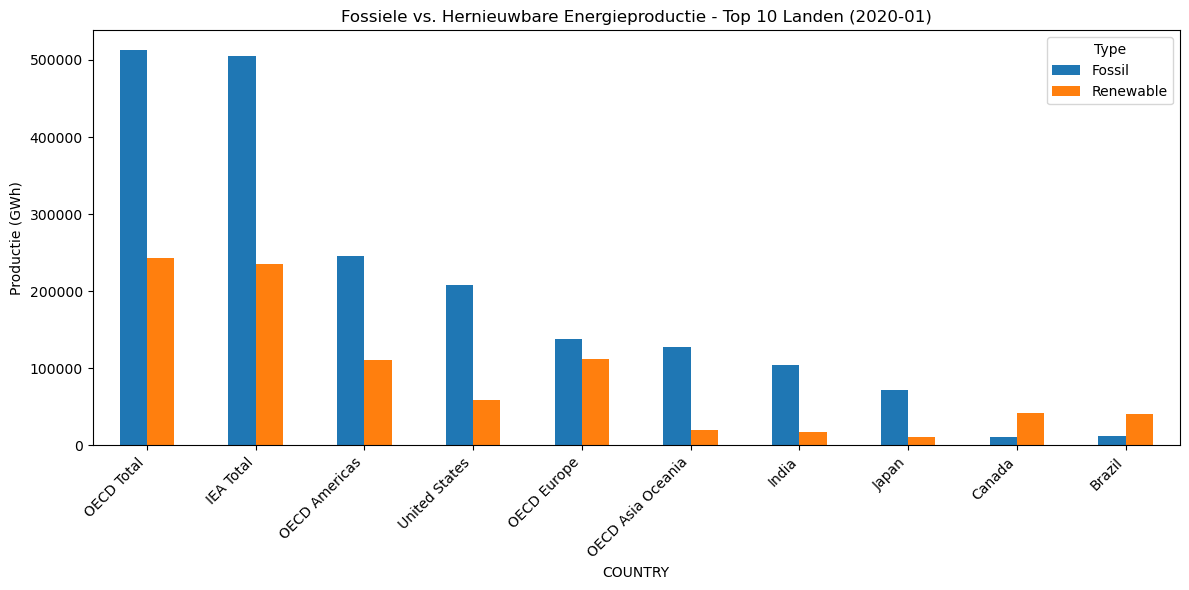

In [6]:
# Kies één maand/jaar
year = 2020
month = 1

df = monthly_df[(monthly_df['YEAR'] == year) & (monthly_df['MONTH'] == month)].copy()

# Alleen relevante bronnen
df = df[df['PRODUCT'].isin(['Total combustible fuels', 'Solar', 'Wind', 'Hydro'])]

# Categoriseer als 'Fossil' of 'Renewable'
def label_type(product):
    return 'Fossil' if product == 'Total combustible fuels' else 'Renewable'

df['Type'] = df['PRODUCT'].apply(label_type)

# Groepeer productie per land per type
agg = df.groupby(['COUNTRY', 'Type'])['VALUE'].sum().unstack().fillna(0)

# Top 10 landen met hoogste totale productie
top_countries = agg.sum(axis=1).sort_values(ascending=False).head(10)
top_agg = agg.loc[top_countries.index]

# Plot
top_agg.plot(kind='bar', figsize=(12, 6), stacked=False)
plt.title(f"Fossiele vs. Hernieuwbare Energieproductie - Top 10 Landen ({year}-{month:02})")
plt.ylabel("Productie (GWh)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Fossil vs. Renewable Energy Production – Top 10 Countries (2020-01, Countries Only)

This bar chart compares energy production from **fossil** and **renewable** sources for the top 10 **individual countries** with the highest energy output in January 2020.

- **Fossil:** Total combustible fuels  
- **Renewable:** Wind, Solar, Hydro  
- **Entity filtering:** All non-country entities (continents, unions, IEA scenarios) were excluded  
- **Classification:** Energy sources labeled as 'Fossil' or 'Renewable'  
- **Selection basis:** Countries ranked by total energy production (GWh)  
- **Visualization:** Unstacked bar chart showing per-country energy source composition  
- **Purpose:** Refines Argument 2.2 by showing a clearer, country-specific distribution of fossil vs. renewable production


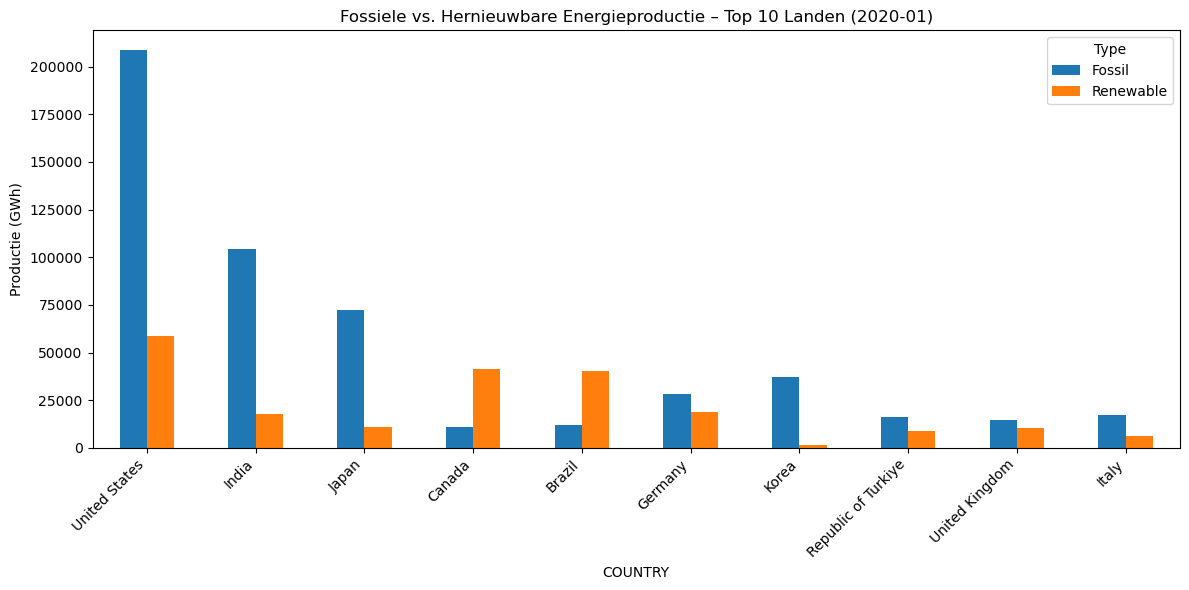

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Dataset inladen
monthly_df = pd.read_csv("data.csv")

# ❌ Lijst met niet-landen uitsluiten
exclude_entities = [
    'World', 'Africa', 'Asia', 'Europe', 'North America', 'South America',
    'European Union (27)', 'European Union (28)', 'OECD', 'Non-OECD',
    'Non-OECD Asia', 'Non-OECD Europe and Eurasia', 'Middle East', 'Eurasia',
    'Other Asia Pacific', 'Central & South America', 'IEA Net Zero by 2050 scenario',
    'IEA Total', 'IEA Europe', 'IEA Americas', 'IEA Asia Oceania',
    'OECD Total', 'OECD Americas', 'OECD Europe', 'OECD Asia Oceania'
]

# 📅 Filter op jaar + maand
year = 2020
month = 1
df = monthly_df[(monthly_df['YEAR'] == year) & (monthly_df['MONTH'] == month)].copy()

# 🔌 Alleen gewenste producten
df = df[df['PRODUCT'].isin(['Total combustible fuels', 'Solar', 'Wind', 'Hydro'])]

# 🧹 Verwijder niet-landen
df = df[~df['COUNTRY'].isin(exclude_entities)]

# 🌱 Label 'Fossil' of 'Renewable'
df['Type'] = df['PRODUCT'].apply(lambda x: 'Fossil' if x == 'Total combustible fuels' else 'Renewable')

# 📊 Groepeer per land/type
agg = df.groupby(['COUNTRY', 'Type'])['VALUE'].sum().unstack().fillna(0)

# 🔝 Top 10 landen met hoogste totale productie
top_countries = agg.sum(axis=1).sort_values(ascending=False).head(10)
top_agg = agg.loc[top_countries.index]

# 📈 Plot de bar chart
top_agg.plot(kind='bar', figsize=(12, 6), stacked=False)
plt.title(f"Fossiele vs. Hernieuwbare Energieproductie – Top 10 Landen ({year}-{month:02})")
plt.ylabel("Productie (GWh)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()







### Renewable Share and Electricity Access Over Time – Germany, India, Nigeria, Afghanistan

Two line charts showing annual developments in:

1. **Renewable Share (%):** Share of renewable energy in total final energy consumption  
2. **Electricity Access (%):** Population percentage with access to electricity  

**Countries selected:** Germany, India, Nigeria, Afghanistan  
**Time coverage:** All available years in dataset  
**Visual details:**  
- Color-coded lines per country  
- Direct labels at final datapoint for clarity  
- Grid lines only on y-axis for readability  
- Custom Plotly styling for consistent contrast  

**Purpose:** Supports comparative insight into the progress and divergence between developed and developing countries on energy transition and infrastructure access.


In [8]:
import pandas as pd
import plotly.express as px

# --- 1. Landen selecteren en data voorbereiden ---
selected = ['Germany', 'India', 'Nigeria', 'Afghanistan']
# Filter en hernoem kolommen
df = (global_df[global_df['Entity'].isin(selected)]
      .rename(columns={
          'Renewable energy share in the total final energy consumption (%)': 'Renewable Share (%)',
          'Access to electricity (% of population)': 'Electricity Access (%)'
      })
      .dropna(subset=['Year', 'Renewable Share (%)', 'Electricity Access (%)']))

# --- 2. Standaard kleurenpalet voor contrast ---
colors = px.colors.qualitative.Safe

# --- 3. Functie om lijnendiagram te plotten met directe labels ---
def plot_with_labels(df, y_col, title, y_label):
    fig = px.line(
        df,
        x='Year',
        y=y_col,
        color='Entity',
        markers=True,
        title=title,
        labels={'Year': 'Jaar', y_col: y_label, 'Entity': 'Land'},
        color_discrete_sequence=colors,
        width=800,
        height=500
    )
    # Layout-opties
    fig.update_layout(
        template='plotly_white',
        xaxis=dict(dtick=1, title='Jaar', showgrid=False),
        yaxis=dict(title=y_label, ticksuffix='%', showgrid=True, gridcolor='LightGray'),
        legend_title_text='Land',
        margin=dict(l=60, r=20, t=80, b=50)
    )
    # Directe labels: plaats landnamen bij laatste datapunt
    for i, country in enumerate(selected):
        d = df[df['Entity'] == country]
        if not d.empty:
            x_last = d['Year'].max()
            y_last = d.loc[d['Year'] == x_last, y_col].values[0]
            fig.add_annotation(
                x=x_last,
                y=y_last,
                text=country,
                xanchor='left',
                yanchor='middle',
                font=dict(color=colors[i], size=12),
                showarrow=False
            )
    fig.show()

# --- 4. Plot Renewable Share ---
plot_with_labels(
    df,
    y_col='Renewable Share (%)',
    title='Aandeel Hernieuwbare Energie per Jaar',
    y_label='Hernieuwbaar aandeel (%)'
)

# --- 5. Plot Electricity Access ---
plot_with_labels(
    df,
    y_col='Electricity Access (%)',
    title='Toegang tot Elektriciteit per Jaar',
    y_label='Elektriciteitstoegang (%)'
)



### Global Monthly Energy Production Share by Type

**Visualization:** Stacked area chart (Plotly)  
**Timeframe:** Monthly data across multiple years  
**Data Source:** `monthly_df` with parsed `"TIME"` as datetime  

**Energy Categories:**
- **Fossil Fuel:** `Total combustible fuels`
- **Renewable:** `Hydro`, `Wind`, `Solar`, `Geothermal`

**Chart Features:**
- Y-axis: % share of global energy production per month
- X-axis: Monthly timeline (formatted yearly)
- Hover templates: Show exact % values per category and date
- Color coding:  
  - Fossil Fuel: firebrick  
  - Renewable: forest green  
- Final point annotations directly labeling both areas

**Purpose:** Reveals dynamic monthly shifts in energy composition, highlighting renewable growth and fossil decline over time.


In [9]:
import pandas as pd
import plotly.graph_objects as go

# Load and categorize data
monthly_df = pd.read_csv("data.csv")
monthly_df['TIME'] = pd.to_datetime(monthly_df['TIME'], format='%B %Y')  # Correct format for "January 2010"

renewable_products = ['Hydro', 'Wind', 'Solar', 'Geothermal']
fossil_fuel_products = ['Total combustible fuels']

def assign_energy_type(product):
    if product in renewable_products: return 'Renewable'
    if product in fossil_fuel_products: return 'Fossil Fuel'
    return 'Other'

monthly_df['Energy_Type'] = monthly_df['PRODUCT'].apply(assign_energy_type)

# 2. Aggregate and calculate percentages
agg = (
    monthly_df
    .groupby(['TIME', 'Energy_Type'])['VALUE']
    .sum()
    .unstack(fill_value=0)
)
agg['Total'] = agg.sum(axis=1)
for col in ['Renewable', 'Fossil Fuel']:
    agg[col + '_pct'] = agg[col] / agg['Total'] * 100
agg = agg.reset_index().sort_values('TIME')

# 3. Create area chart with Graph Objects
fig = go.Figure()

# Fossil fuel area
fig.add_trace(go.Scatter(
    x=agg['TIME'], y=agg['Fossil Fuel_pct'],
    name='Fossil Fuel',
    mode='lines',
    line=dict(width=0.5, color='firebrick'),
    fill='tozeroy',
    fillcolor='rgba(178,34,34,0.6)',
    hovertemplate='Date: %{x|%Y-%m}<br>Fossil Fuel: %{y:.0f}%<extra></extra>'
))

# Renewable area, stacked above Fossil
fig.add_trace(go.Scatter(
    x=agg['TIME'], y=agg['Renewable_pct'] + agg['Fossil Fuel_pct'],
    name='Renewable',
    mode='lines',
    line=dict(width=0.5, color='forestgreen'),
    fill='tonexty',
    fillcolor='rgba(34,139,34,0.6)',
    customdata=agg['Renewable_pct'],  # Pass renewable percentage for hover
    hovertemplate='Date: %{x|%Y-%m}<br>Renewable: %{customdata:.0f}%<extra></extra>'
))

# 4. Add direct labels at the end
last = agg.iloc[-1]
annotations = [
    dict(x=last['TIME'], y=last['Fossil Fuel_pct']/2,
         text='Fossil Fuel', showarrow=False,
         font=dict(color='firebrick', size=12)),
    dict(x=last['TIME'], y=last['Fossil Fuel_pct'] + last['Renewable_pct']/2,
         text='Renewable', showarrow=False,
         font=dict(color='forestgreen', size=12)),
]

# 5. Layout & styling
fig.update_layout(
    template='simple_white',
    title=dict(text='Monthly Energy Production Breakdown by Type (Global %)', x=0.5),
    xaxis=dict(
        title='Date',
        tickformat='%Y',
        dtick='M12',
        showgrid=False
    ),
    yaxis=dict(
        title='Share (%)',
        range=[0,100],
        showgrid=True,
        gridcolor='LightGray',
        tickformat='.0f'
    ),
    margin=dict(l=60, r=20, t=80, b=50),
    showlegend=False,
    annotations=annotations
)

fig.show()

### Renewable Energy Share vs. GDP per Capita (Animated Scatterplot)

**Visualization:** Animated scatterplot (Plotly) with LOWESS trendline  
**Timeframe:** Yearly (slider-controlled animation)  
**Data Source:** `global-data-on-sustainable-energy.csv`  

**Axes:**
- X-axis: GDP per Capita (log scale)
- Y-axis: Renewable energy share (% of final energy consumption)

**Marker Features:**
- Color: Access to clean fuels for cooking (%), Viridis scale
- Size: Fixed (8), dark border for contrast
- Tooltip: Country, GDP, Renewable %, Clean Fuel %

**Design Notes:**
- Gridlines: light gray on both axes
- Color bar: labeled “Clean Fuels (%)”
- Animation slider: chronological, positioned below plot
- Trendline: LOWESS per frame for smoothed correlation estimate

**Purpose:** Shows relationship between economic development and renewable energy adoption over time, with energy cleanliness as an additional axis of context.


In [10]:
import pandas as pd
import plotly.express as px

# 1. Data laden en kolom hernoemen
df = pd.read_csv("global-data-on-sustainable-energy.csv")
df = df.rename(columns={
    "Renewable energy share in the total final energy consumption (%)": "Renewable_Share"
}).dropna(subset=["gdp_per_capita", "Renewable_Share", "Access to clean fuels for cooking"])

# 2. Bepaal de oplopende lijst met jaren
years_sorted = sorted(df["Year"].unique())

# 3. Maak de scatterplot met trendline en animatie
fig = px.scatter(
    df,
    x="gdp_per_capita",
    y="Renewable_Share",
    animation_frame="Year",
    category_orders={"Year": years_sorted},  # forceert de slider-orde
    hover_name="Entity",
    hover_data={
        "gdp_per_capita": ":,.0f",
        "Renewable_Share": ":.1f",
        "Access to clean fuels for cooking": ":.0f"
    },
    log_x=True,
    trendline="lowess",
    title="Renewable Energy Share vs. GDP per Capita (log scale)",
    labels={
        "gdp_per_capita": "GDP per Capita (USD)",
        "Renewable_Share": "Renewable Share (%)",
        "Access to clean fuels for cooking": "Clean Fuels (%)"
    },
    color="Access to clean fuels for cooking",
    color_continuous_scale="Viridis",
    width=900,
    height=600,
)

# 4. Marker- en lijnstijl
fig.update_traces(
    marker=dict(size=8, opacity=0.7, line=dict(width=1, color="DarkSlateGrey")),
    selector=dict(mode="markers")
)

# 5. Layout: clean white theme, gridlines en slider‐layout
fig.update_layout(
    template="plotly_white",
    xaxis=dict(
        type="log",
        tickformat=",",
        gridcolor="LightGray",
        title="GDP per Capita (log scale)"
    ),
    yaxis=dict(
        gridcolor="LightGray",
        title="Renewable Share (%)"
    ),
    coloraxis_colorbar=dict(
        title="Clean Fuels (%)",
        ticks="outside"
    ),
    sliders=[dict(
        currentvalue=dict(prefix="Year: "),
        pad=dict(t=50)
    )],
    title=dict(x=0.5, xanchor="center"),
    margin=dict(l=60, r=20, t=80, b=60)
)

fig.show()


### Renewable Energy Share Trends for Selected Countries (Small Multiples)

**Visualization:** Small multiple line charts (Plotly Express facet_col)  
**Countries Included:** United States, China, India, Germany, Brazil, Nigeria, Japan, Australia, Norway, Saudi Arabia  
**Timeframe:** Yearly  
**Data Source:** `global-data-on-sustainable-energy.csv`  

**Axes:**
- X-axis: Year (common across all facets)
- Y-axis: Renewable energy share (%) — independent scale per country

**Design Features:**
- Facets: One plot per country (2 rows, 5 columns)
- Color: Country-specific (redundant within facets but improves legend clarity)
- Titles: Cleaned (facet headers show only country names)
- Layout Height: 800px for readability

**Purpose:** Enables direct country-to-country comparison of renewable energy adoption trends while preserving resolution through individualized y-axis scaling.


In [11]:
import pandas as pd
import plotly.express as px

# Load the dataset
global_df = pd.read_csv("global-data-on-sustainable-energy.csv")

# Rename the column for convenience
global_df_renamed = global_df.rename(columns={'Renewable energy share in the total final energy consumption (%)': 'Renewable_Share'})

# Filter out non-country entities like 'World', 'European Union', etc.
df_countries = global_df_renamed[~global_df_renamed['Entity'].isin(['World', 'European Union', 'Africa', 'Asia', 'North America', 'South America', 'Europe', 'Oceania'])].copy()

# Select a subset of interesting countries for the small multiples
sample_countries = ['United States', 'China', 'India', 'Germany', 'Brazil', 'Nigeria', 'Japan', 'Australia', 'Norway', 'Saudi Arabia']
df_selected_countries = df_countries[df_countries['Entity'].isin(sample_countries)].dropna(subset=['Renewable_Share']).sort_values(by=['Entity', 'Year'])

# Corrected: Changed 'facet_wrap' to 'facet_col'
fig_facet_lines = px.line(
    df_selected_countries,
    x="Year",
    y="Renewable_Share",
    color="Entity", # Each country gets its own color (though it will be redundant with faceting)
    facet_col="Entity", # Create a subplot for each country
    facet_col_wrap=5, # Arrange in 5 columns
    title="Renewable Energy Share Trends for Selected Countries",
    labels={
        "Renewable_Share": "Renewable Share (%)",
        "Entity": "Country"
    },
    height=800 # Adjust height based on number of countries
)

fig_facet_lines.update_yaxes(matches=None) # Allow independent y-axes for better comparison if scales differ
fig_facet_lines.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1])) # Clean up facet titles

fig_facet_lines.show()

### Annual Growth of Renewable Energy Share per Country (Choropleth Animation)

**Visualization Type:** Animated choropleth map  
**Timeframe:** Annual, starting from 2001  
**Data Source:** `global-data-on-sustainable-energy.csv`  

**Growth Classification Logic:**
- **Decline:** Year-over-year decrease (`Growth < 0%`)
- **Neutral:** No change (`Growth = 0%`)
- **Increase:** Year-over-year growth (`Growth > 0%`)

**Color Encoding:**
- Decline → Red (`#d62728`)
- Neutral → Grey (`#7f7f7f`)
- Increase → Blue (`#1f77b4`)

**Design Features:**
- Ocean and lake fill: Light blue
- Countries with missing data: White
- Faceted rectangular legend bar aligned to top of map
- Discrete color bar with annotations:
  - Left: "Decline (<0%)"
  - Center: "Neutral (=0%)"
  - Right: "Increase (>0%)"
- Map projection: Equirectangular
- Slider defaults to year 2001 if available

**Interactivity:**
- Animation over years
- Hover shows:
  - Country name
  - Renewable share
  - Exact growth rate (2 decimal precision)

**Purpose:** Detect spatial and temporal patterns in renewable energy adoption momentum across countries, highlighting both regressions and improvements annually.


In [12]:
import pandas as pd
import plotly.express as px
import numpy as np

# 1. Data inladen en hernoemen
csv_path = "global-data-on-sustainable-energy.csv"
df = pd.read_csv(csv_path)
df.rename(
    columns={
        "Renewable energy share in the total final energy consumption (%)": "Renewable_Share"
    },
    inplace=True
)

# 2. Jaar-op-jaar groei berekenen per land
df.sort_values(["Entity", "Year"], inplace=True)
df['Growth'] = df.groupby("Entity")["Renewable_Share"].diff()

# 3. Categoriseer groei in Decline, Neutral, Increase
def categorize_growth(x):
    if pd.isna(x):
        return np.nan
    return 'Decline' if x < 0 else ('Neutral' if x == 0 else 'Increase')

growth_labels = ['Decline', 'Neutral', 'Increase']
df['Growth_Cat'] = df['Growth'].apply(categorize_growth)

# 4. Choropleth met earth tones kleuren en jaar-animatie
color_map = {
    'Decline': '#d62728',  # red for decline
    'Neutral': '#7f7f7f',  # grey for neutral
    'Increase': '#1f77b4'   # blue for increase
}  # contrasting palette for clarity

fig = px.choropleth(
    df,
    locations="Entity",
    locationmode="country names",
    color="Growth_Cat",
    category_orders={"Growth_Cat": growth_labels},
    color_discrete_map=color_map,
    hover_name="Entity",
    hover_data={"Renewable_Share": True, "Growth": ":.2f"},
    animation_frame="Year",
    title="Annual Growth of Renewable Energy Share per Country",
    width=1000,
    height=600
)

# 5. Kaartstijl met lichtblauwe oceaan en witte landen zonder data
fig.update_geos(
    showocean=True,
    oceancolor='lightblue',
    showlakes=True,
    lakecolor='lightblue',
    showcountries=True,
    countrycolor='LightGray',
    showframe=False,
    projection_type='equirectangular',
    landcolor='white'
)

# 6. Eenvoudige legendebalk bovenaan met earth tones
gap_top = 0.08
bar_height = 0.03  # smaller bar for more map space
t_colors = ['#d62728', '#7f7f7f', '#1f77b4']  # match color_map
t_labels = ['Decline (<0%)', 'Neutral (=0%)', 'Increase (>0%)']
shapes = []
annotations = []
for i, col in enumerate(t_colors):
    x0, x1 = i/3, (i+1)/3
    shapes.append({
        'type': 'rect', 'xref': 'paper', 'yref': 'paper',
        'x0': x0, 'x1': x1, 'y0': 1+gap_top, 'y1': 1+gap_top+bar_height,
        'fillcolor': col, 'line_width': 0
    })
    annotations.append({
        'xref': 'paper', 'yref': 'paper',
        'x': (x0+x1)/2, 'y': 1+gap_top-0.02,
        'text': t_labels[i], 'showarrow': False,
        'font': {'size': 12, 'family': 'Arial', 'color': '#333'},
        'align': 'center'
    })
fig.update_layout(
    shapes=shapes,
    annotations=annotations,
    margin={'t':100, 'b':50, 'l':20, 'r':20},  # reduce margins to enlarge map

    showlegend=False
)

# 7. Slider start op 2001
years = sorted(df['Year'].dropna().unique())
start_idx = years.index(2001) if 2001 in years else 0
fig.update_layout(
    sliders=[{
        'currentvalue': {'prefix': 'Year: '},
        'pad': {'t': 60},
        'active': start_idx
    }]
)

# 8. Toon de plot
fig.show()












### Dominant Energy Source per Country Over Time (Choropleth Animation)

**Visualization Type:** Animated choropleth map  
**Timeframe:** Annual (based on `YEAR` column from `data.csv`)  
**Data Filter:** Only the following energy types are considered:
- Coal, Oil, Natural Gas, Hydro, Wind, Solar, Nuclear, Biomass

**Computation Logic:**
1. Aggregate total energy production (`VALUE`) per `COUNTRY`, `YEAR`, `PRODUCT`
2. Identify the highest `VALUE` per country-year → label as `Dominant_Source`

**Color Encoding:**
- Coal → `#4C4C4C`
- Oil → `#A569BD`
- Natural Gas → `#3498DB`
- Hydro → `#1ABC9C`
- Wind → `#2ECC71`
- Solar → `#F1C40F`
- Nuclear → `#E67E22`
- Biomass → `#95A5A6`

**Design Features:**
- Choropleth map with yearly animation
- Fixed color mapping for consistency across frames
- Legend labeled “Energy Source”
- Slider reflects ascending temporal order

**Purpose:** Visualize transitions in national energy dominance over time, enabling detection of structural shifts (e.g., from fossil fuels to renewables) and geographic energy strategy contrasts.


In [13]:
import pandas as pd
import plotly.express as px

# 1) Data inladen
monthly = pd.read_csv("data.csv")

# 2) Definieer welke producten je wilt samenvatten
sources = ['Coal', 'Oil', 'Natural Gas', 'Hydro', 'Wind', 'Solar', 'Nuclear', 'Biomass']
monthly = monthly[monthly['PRODUCT'].isin(sources)]

# 3) Totalen per land/jaar en vind de grootste bron
agg = (
    monthly
    .groupby(['COUNTRY', 'YEAR', 'PRODUCT'])['VALUE']
    .sum()
    .reset_index()
)
dominant = (
    agg.sort_values(['COUNTRY', 'YEAR', 'VALUE'], ascending=[True, True, False])
       .groupby(['COUNTRY', 'YEAR'])
       .first()
       .reset_index()
       .rename(columns={'PRODUCT': 'Dominant_Source'})
)

# 4) Bepaal oplopende lijst met jaartallen
years_sorted = sorted(dominant['YEAR'].unique())

# 5) Choropleth met jaaranimatie (klein→groot)
color_map = {
    'Coal':        '#4C4C4C',
    'Oil':         '#A569BD',
    'Natural Gas': '#3498DB',
    'Hydro':       '#1ABC9C',
    'Wind':        '#2ECC71',
    'Solar':       '#F1C40F',
    'Nuclear':     '#E67E22',
    'Biomass':     '#95A5A6',
}

fig = px.choropleth(
    dominant,
    locations="COUNTRY",
    locationmode="country names",
    color="Dominant_Source",
    animation_frame="YEAR",
    category_orders={"YEAR": years_sorted},   # forceert oplopende volgorde
    color_discrete_map=color_map,
    title="Dominant Energy Source per Country Over Time",
    labels={"Dominant_Source": "Dominant Source"},
    width=1000,
    height=600
)

fig.update_layout(
    legend_title_text='Energy Source',
    margin=dict(t=100, b=50, l=50, r=50)
)

fig.show()


# Reflection

We integrated peer and TA feedback to:
- Increase the clarity of our arguments in the visualizations’ captions
- Ensure balance between interactivity and interpretability
- Reduce overcrowded visuals by filtering key categories and countries
- Restructure the story to align more closely with reader logic

We also used design heuristics to evaluate our visual encoding choices, ensuring effective axis scaling, color-blind safe palettes, and proper chart types for each relationship.

---

## Synthesis of Visual Arguments and Conclusions

Each graph supports a distinct facet of the renewable energy narrative:

- **Scatterplot of Renewable Energy Share vs. GDP per Capita**  
  Reveals the positive correlation between economic development and renewable energy adoption, highlighting disparities in clean fuel access at varying income levels.

- **Faceted Line Charts of Selected Countries’ Renewable Share Trends**  
  Expose country-specific trajectories, illustrating heterogeneous progress and policy impacts over time.

- **Choropleth of Annual Growth in Renewable Share**  
  Visualizes spatial and temporal variation in momentum, distinguishing regions with accelerating renewable adoption from those in decline or stagnation.

- **Choropleth of Dominant Energy Sources per Country Over Time**  
  Maps the shifting energy landscape, indicating transitions from fossil fuels toward renewables in some regions while others remain dependent on traditional sources.

Collectively, these visualizations argue that economic factors, policy environments, and regional contexts drive divergent renewable energy pathways worldwide. The data suggest a gradual global shift toward renewables, tempered by persistent inequalities and varying growth dynamics.

---

# Work Distribution

- **Leonardo Sabatini:** Developed the website framework on GitHub Pages, consolidated graphs and code into a unified file, contributed several key visualizations.  
- **Jordan Cheuk-Alam:** Created the majority of graphs, ensured data accuracy, and authored the website introduction.  
- **Hanna Daorah:** Led site deployment research and processes, facilitated team proficiency with Jupyter Book commands and GitHub publishing, and curated source material for the report’s introduction and perspectives.  
- **Santino Petrovic:** Assisted in dataset identification, provided general team support, contributed to refining arguments and ensuring cohesion.

All members participated in coordination and collective review to maintain quality and consistency.
